In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1: Load and Preprocess the Data**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

try:
    train_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/training.csv')
    test_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/test.csv')

    display(train_df.head())
    display(test_df.head())

    print("Train shape:", train_df.shape)
    print("Test shape:", test_df.shape)
except FileNotFoundError as e:
    print(f"Error: {e}")
    train_df = None
    test_df = None

except pd.errors.ParserError:
    print("Error: Could not parse one of the CSV files. Please check their formats.")
    train_df = None
    test_df = None


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


Train shape: (250000, 33)
Test shape: (550000, 31)


In [6]:
# Check missing values in train dataset
print("Missing values in train dataset:")
print(train_df.isnull().sum())

# Check missing values in test dataset
print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

Missing values in train dataset:
EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_su

In [7]:
print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())

Train columns: ['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']
Test columns: ['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_p

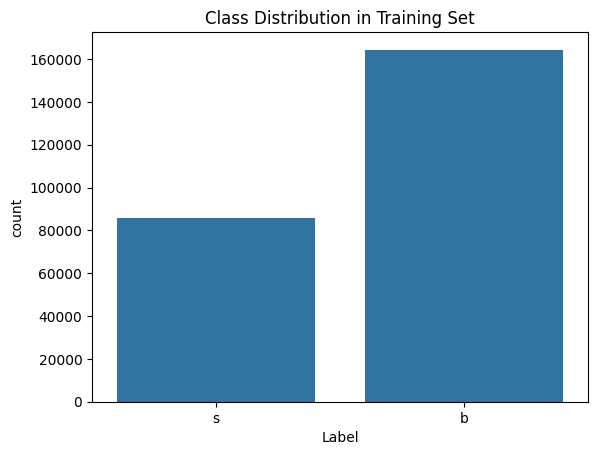

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=train_df)
plt.title("Class Distribution in Training Set")
plt.show()

#dataset is imbalace

In [9]:
# Use train.csv for training + validation
X = train_df.drop(columns=['EventId', 'Label', 'Weight'])  # use all features
y = (train_df['Label'] == 's').astype(int)                 # target: 1 for signal, 0 for background

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [10]:
# Standardize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [11]:
# Use test.csv only after training
# we do not split test.csv — it has no labels, so it can’t be split for evaluation.
X_test = test_df.drop(columns=['EventId'])
X_test = scaler.transform(X_test)  # use same scaler

# **Baseline Model**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

In [13]:
baseline_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
baseline_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# **Train the model**

In [15]:
history_baseline = baseline_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=256,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8028 - loss: 0.4246 - val_accuracy: 0.8277 - val_loss: 0.3883
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8274 - loss: 0.3805 - val_accuracy: 0.8322 - val_loss: 0.3797
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8292 - loss: 0.3770 - val_accuracy: 0.8305 - val_loss: 0.3744
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8330 - loss: 0.3705 - val_accuracy: 0.8339 - val_loss: 0.3715
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8343 - loss: 0.3690 - val_accuracy: 0.8339 - val_loss: 0.3699
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8330 - loss: 0.3690 - val_accuracy: 0.8346 - val_loss: 0.3736
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.3683 - val_accuracy: 0.8347 - val_loss: 0.3703
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8350 - loss: 0.3648 - val_accuracy: 0.

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

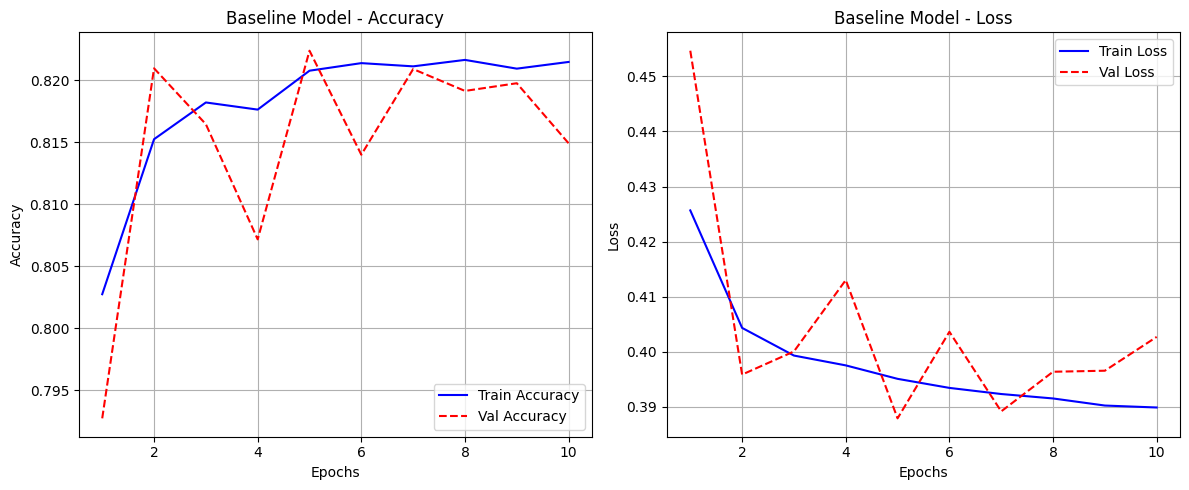

In [ ]:
plot_learning_curves(history_baseline, title='Baseline Model')

# **Evaluate model's performance**

In [21]:
loss1, acc1 = baseline_model.evaluate(X_val, y_val)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_val_pred = (baseline_model.predict(X_val) > 0.5).astype(int)

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_val_pred):.4f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8309 - loss: 0.3777
Test accuracy : 83.11%
Test loss     : 37.74%
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[29608  3259]
 [ 5184 11949]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     32867
           1       0.79      0.70      0.74     17133

    accuracy                           0.83     50000
   macro avg       0.82      0.80      0.81     50000
weighted avg       0.83      0.83      0.83     50000

ROC-AUC Score: 0.7991


# **Improved MLP Model**
   **Underfitting vs Overfitting Models**

In [22]:
# Underfitting: Very small model
def build_small_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

# Overfitting: Deep + Wide
def build_large_model():
    model = Sequential([
         Input(shape=(X_train.shape[1],)),
         Dense(512, activation='relu'),
         Dense(512, activation='relu'),
         Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

In [23]:
small_model = build_small_model()

small_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

small_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
large_model = build_large_model()

large_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

large_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,041 (1.06 MB)

 Trainable params: 279,041 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history_small = small_model.fit(X_train, y_train , epochs=30, validation_split=0.2 , batch_size=128 )

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7525 - loss: 0.4979 - val_accuracy: 0.8142 - val_loss: 0.4086
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8187 - loss: 0.4034 - val_accuracy: 0.8217 - val_loss: 0.3966
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8236 - loss: 0.3927 - val_accuracy: 0.8226 - val_loss: 0.3941
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8255 - loss: 0.3887 - val_accuracy: 0.8248 - val_loss: 0.3890
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8272 - loss: 0.3871 - val_accuracy: 0.8269 - val_loss: 0.3871
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8274 - loss: 0.3833 - val_accuracy: 0.8262 - val_loss: 0.3874
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8281 - loss: 0.3838 - val_accuracy: 0.8265 - val_loss: 0.3861
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8299 - loss: 0.3805 -

In [26]:
history_large = large_model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8014 - loss: 0.4249 - val_accuracy: 0.8286 - val_loss: 0.3787
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8300 - loss: 0.3769 - val_accuracy: 0.8311 - val_loss: 0.3759
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8320 - loss: 0.3731 - val_accuracy: 0.8337 - val_loss: 0.3735
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8356 - loss: 0.3666 - val_accuracy: 0.8334 - val_loss: 0.3709
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8345 - loss: 0.3653 - val_accuracy: 0.8340 - val_loss: 0.3694
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8358 - loss: 0.3623 - val_accuracy: 0.8347 - val_loss: 0.3695
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8378 - loss: 0.3616 - val_accuracy: 0.8359 - val_loss: 0.3677
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8387 -

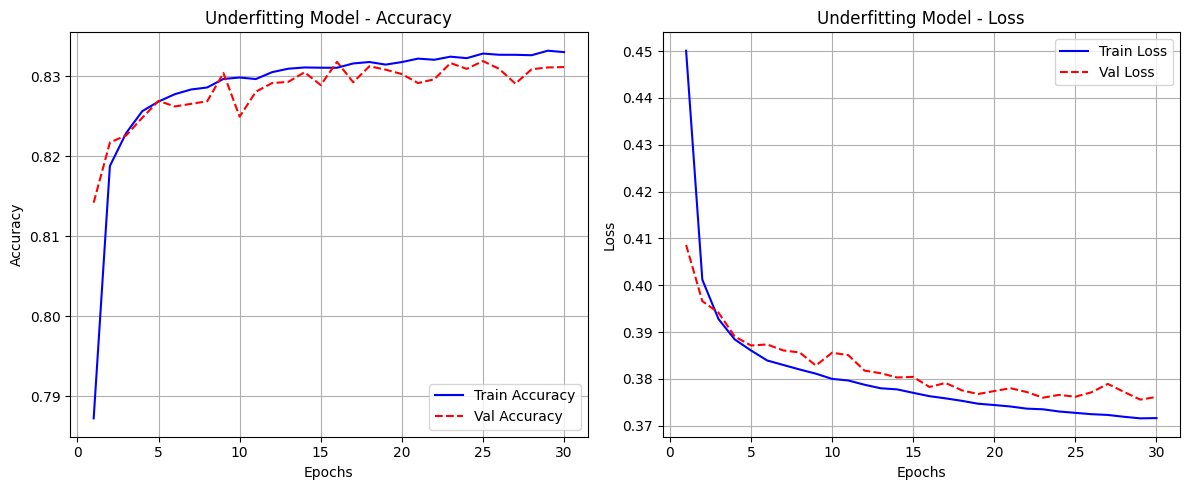

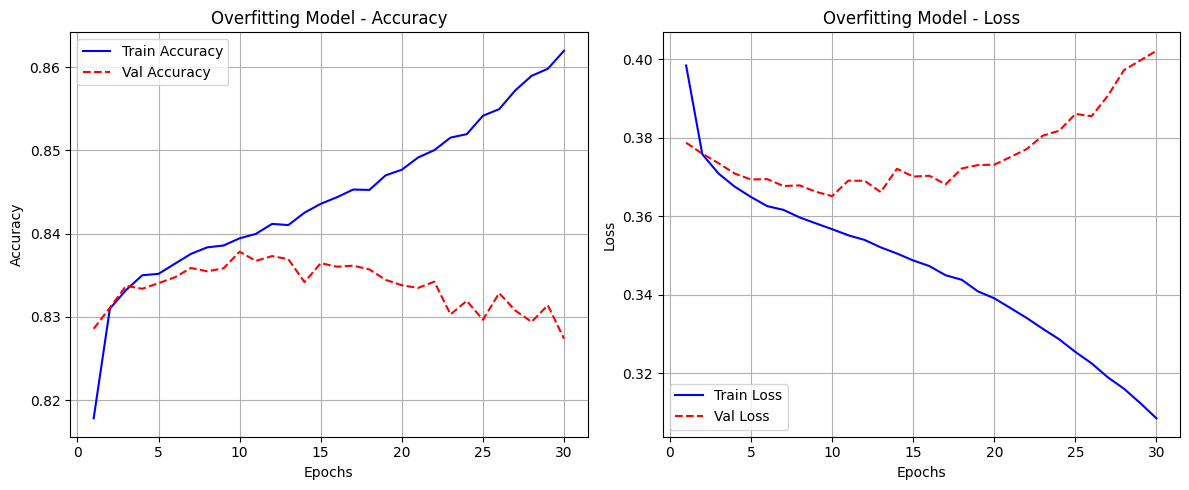

In [27]:
plot_learning_curves(history_small, title='Underfitting Model')
plot_learning_curves(history_large, title='Overfitting Model')

# **Regularized Model**

    Dropout Regularization

In [28]:
from tensorflow.keras.layers import Dropout
def build_dropout_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

reg_model_1 = build_dropout_model()
reg_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reg_model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,041 (1.06 MB)

 Trainable params: 279,041 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history_reg_1 = reg_model_1.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7910 - loss: 0.4372 - val_accuracy: 0.8263 - val_loss: 0.3836
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8257 - loss: 0.3868 - val_accuracy: 0.8305 - val_loss: 0.3791
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8277 - loss: 0.3804 - val_accuracy: 0.8299 - val_loss: 0.3750
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8294 - loss: 0.3790 - val_accuracy: 0.8338 - val_loss: 0.3704
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8325 - loss: 0.3750 - val_accuracy: 0.8338 - val_loss: 0.3708
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8298 - loss: 0.3760 - val_accuracy: 0.8315 - val_loss: 0.3716
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8336 - loss: 0.3721 - val_accuracy: 0.8332 - val_loss: 0.3720
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8346 -

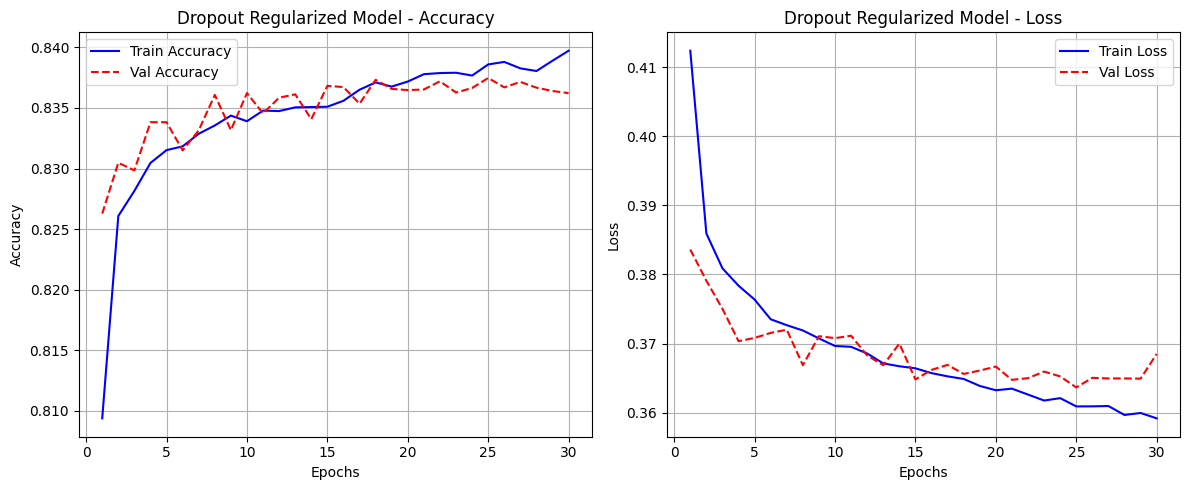

In [30]:
plot_learning_curves(history_reg_1, title='Dropout Regularized Model')

# **L2 Regularization**

In [31]:
from tensorflow.keras import layers, models, regularizers
def build_l2_regularized_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

reg_model_2 = build_l2_regularized_model()
reg_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reg_model_2.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,041 (1.06 MB)

 Trainable params: 279,041 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history_reg_2 = reg_model_2.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7967 - loss: 0.5911 - val_accuracy: 0.8255 - val_loss: 0.4104
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8229 - loss: 0.4115 - val_accuracy: 0.8289 - val_loss: 0.4018
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8267 - loss: 0.4006 - val_accuracy: 0.8277 - val_loss: 0.3987
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8307 - loss: 0.3940 - val_accuracy: 0.8298 - val_loss: 0.3919
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8282 - loss: 0.3923 - val_accuracy: 0.8304 - val_loss: 0.3887
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8300 - loss: 0.3897 - val_accuracy: 0.8299 - val_loss: 0.3894
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8314 - loss: 0.3884 - val_accuracy: 0.8275 - val_loss: 0.3922
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8314 -

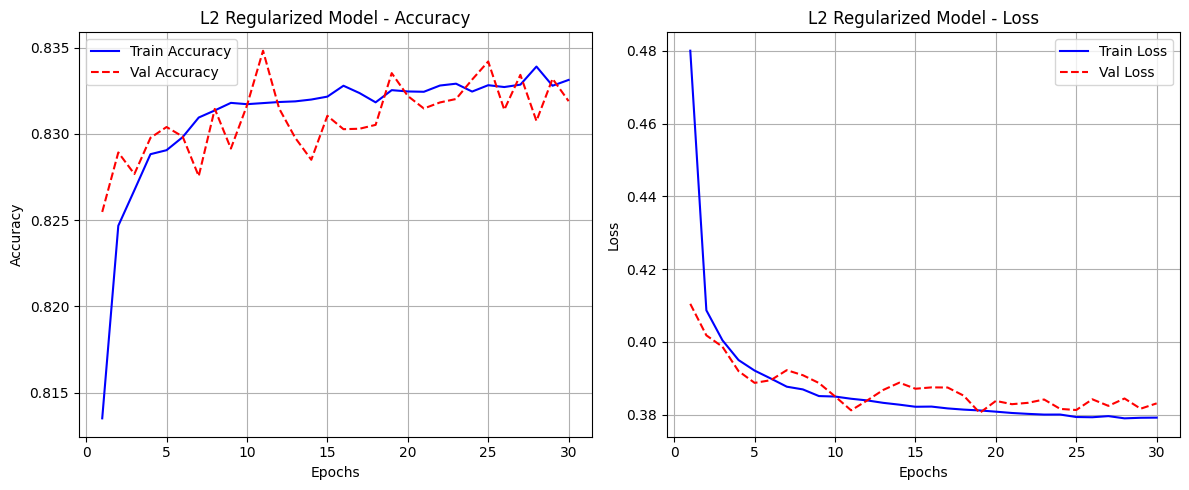

In [33]:
plot_learning_curves(history_reg_2, title='L2 Regularized Model')

# **Combined Regularized Model**

In [34]:
def build_regularized_model():
    model = models.Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.2),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

reg_model_3 = build_regularized_model()
reg_model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reg_model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,041 (1.06 MB)

 Trainable params: 279,041 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history_reg_3 = reg_model_3.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7938 - loss: 0.6079 - val_accuracy: 0.8222 - val_loss: 0.4225
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8233 - loss: 0.4211 - val_accuracy: 0.8246 - val_loss: 0.4117
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8225 - loss: 0.4144 - val_accuracy: 0.8262 - val_loss: 0.4056
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8257 - loss: 0.4077 - val_accuracy: 0.8242 - val_loss: 0.4080
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8260 - loss: 0.4051 - val_accuracy: 0.8256 - val_loss: 0.4088
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8266 - loss: 0.4044 - val_accuracy: 0.8281 - val_loss: 0.4019
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8250 - loss: 0.4060 - val_accuracy: 0.8269 - val_loss: 0.4006
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8292 -

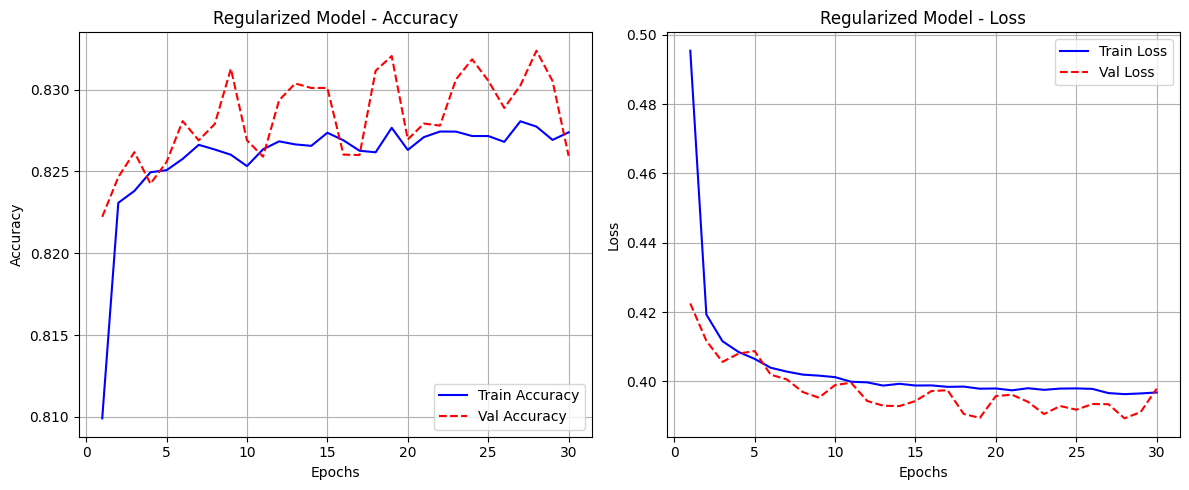

In [36]:
plot_learning_curves(history_reg_3, title='Regularized Model')

# **Comparison**

In [37]:
# Evaluate on test set
models_dict = {
    "Baseline": baseline_model,
    "Underfitting": small_model,
    "Overfitting": large_model,
    "Dropout Regularized": reg_model_1,
    "L2 Regularized": reg_model_2,
    "Combined Regularized": reg_model_3
}

for name, model in models_dict.items():
    test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f'{name} Model Test Accuracy: {test_acc:.4f}')


Baseline Model Test Accuracy: 0.8311
Underfitting Model Test Accuracy: 0.8302
Overfitting Model Test Accuracy: 0.8254
Dropout Regularized Model Test Accuracy: 0.8345
L2 Regularized Model Test Accuracy: 0.8304
Combined Regularized Model Test Accuracy: 0.8228


# **Learning Rate Experimentation**

In [38]:
def build_lr_model():
    model = models.Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    return model




In [39]:
# Learning rates to test
import tensorflow as tf
learning_rates = {
    'Low LR (1e-5)': 1e-5,
    'Medium LR (1e-3)': 1e-3,
    'High LR (1e-1)': 1e-1
}

histories_lr = {}

for label, lr in learning_rates.items():
    print(f"\nTraining with {label}")
    model = build_lr_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=0)
    histories_lr[label] = history


Training with Low LR (1e-5)

Training with Medium LR (1e-3)

Training with High LR (1e-1)


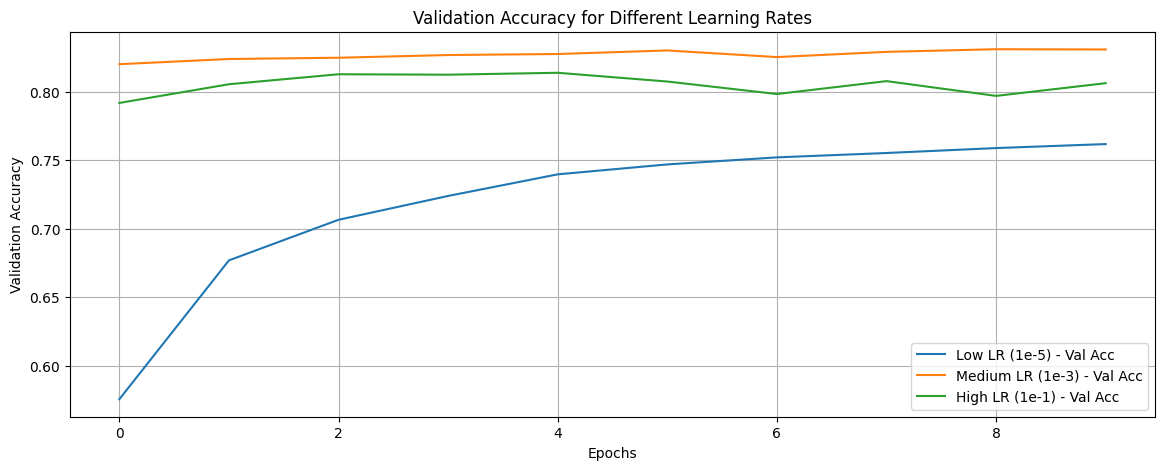

In [40]:
def plot_lr_comparisons(histories):
    plt.figure(figsize=(14, 5))

    for label, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{label} - Val Acc')

    plt.title("Validation Accuracy for Different Learning Rates")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lr_comparisons(histories_lr)


# **Best Model**

In [41]:
from tensorflow.keras.layers import BatchNormalization, Activation
def build_best_mlp():
    model = models.Sequential([
        Input(shape=(X_train.shape[1],)),

        Dense(1024),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),

        Dense(512),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),

        Dense(256),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),

        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

In [42]:
best_mlp = build_best_mlp()
best_mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
best_mlp.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1024)           │        31,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,025 (2.81 MB)

 Trainable params: 733,057 (2.80 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_fashion_mnist_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

In [44]:
history_best_mlp = best_mlp.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    callbacks=[reduce_lr, checkpoint, early_stop],
    verbose=1
)

Epoch 1/100
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 0.5023
Epoch 1: val_loss improved from inf to 0.38493, saving model to best_fashion_mnist_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7501 - loss: 0.5022 - val_accuracy: 0.8257 - val_loss: 0.3849 - learning_rate: 0.0010
Epoch 2/100
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8148 - loss: 0.4057
Epoch 2: val_loss improved from 0.38493 to 0.37818, saving model to best_fashion_mnist_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.8148 - loss: 0.4057 - val_accuracy: 0.8294 - val_loss: 0.3782 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8163 - loss: 0.4028
Epoch 3: val_loss improved from 0.37818 to 0.37633, saving model to best_fashion_mnist_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.8163 - loss: 0.4028 - val_accuracy: 0.8299 - val_loss: 0.3763 - learning_rate: 0.0010
Ep

 test dataset has no target variable, that means it’s meant only for prediction, not evaluation.

# **Training and Validation Accuracy/Loss**

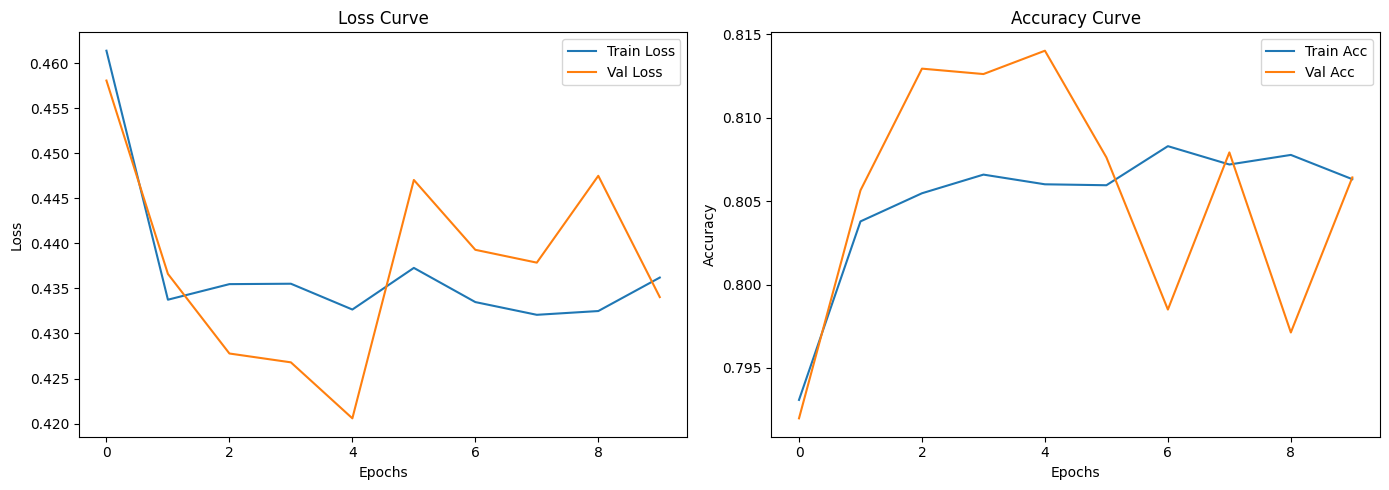

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()

plt.tight_layout()
plt.show()


# **Report Performance on Validation Set**

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Accuracy: 0.83716
Classification Report:
               precision    recall  f1-score   support

           0     0.8609    0.8973    0.8787     32867
           1     0.7855    0.7219    0.7524     17133

    accuracy                         0.8372     50000
   macro avg     0.8232    0.8096    0.8155     50000
weighted avg     0.8351    0.8372    0.8354     50000

Confusion Matrix:
 [[29490  3377]
 [ 4765 12368]]
ROC-AUC: 0.9071106398192024


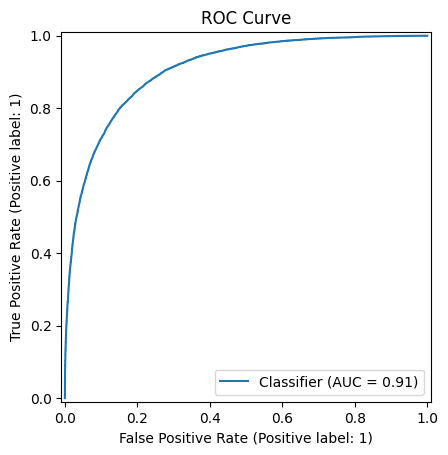

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Predict
y_val_probs = best_mlp.predict(X_val)
y_val_pred = (y_val_probs > 0.5).astype(int).flatten()

# Metrics
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_val_probs)
print("ROC-AUC:", roc_auc)

# ROC Curve
RocCurveDisplay.from_predictions(y_val, y_val_probs)
plt.title('ROC Curve')
plt.show()


**Test dataset is used for predictions rather then evaulation**

In [54]:
y_test_pred_probs = best_mlp.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

print(y_test_pred[:10])

17188/17188 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


# **Compare with Tree-Based Baseline (XGBoost)**

In [53]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)

print("XGBoost Accuracy:", accuracy_score(y_val, xgb_pred))
print("XGBoost Report:\n", classification_report(y_val, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.83896
XGBoost Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     32867
           1       0.79      0.73      0.76     17133

    accuracy                           0.84     50000
   macro avg       0.82      0.81      0.82     50000
weighted avg       0.84      0.84      0.84     50000



# **Reflection**

• **How did model depth and activation affect performance?**

Increasing model depth allowed the network to capture more complex patterns, which initially improved performance. However, deeper models also increased the risk of overfitting. Using the ReLU activation function helped speed up convergence and avoid vanishing gradients, making it more effective than sigmoid in hidden layers.

**• What helped mitigate overfitting?**

Applying dropout layers, using early stopping, and tuning the model complexity helped reduce overfitting. Dropout randomly turned off neurons during training, forcing the model to generalize better. Early stopping prevented the model from continuing training after the validation loss stopped improving.

**• How did the learning rate and optimizer affect convergence?**

A learning rate that was too high led to unstable training, while too low caused slow convergence. The Adam optimizer provided a balance by adapting the learning rate for each parameter, which improved convergence speed and overall training performance compared to SGD.

**• What would you improve with more time or compute?**

With more resources, I would:

Conduct a hyperparameter search (e.g., learning rate, batch size, dropout rate)

Try deeper or alternative architectures (like CNNs or residual connections)

Apply ensemble methods (e.g., averaging MLP with XGBoost predictions)

Perform feature selection or dimensionality reduction for cleaner inputs